In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Text(0, 0.5, 'CO2 Emissions')

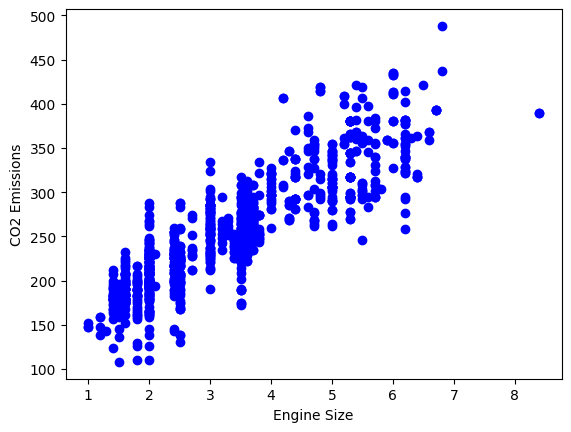

In [5]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [30]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [31]:
train_x = np.asanyarray(train[['ENGINESIZE']])
test_x = np.asanyarray(test[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [32]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
preds = regr.predict(test_x)

In [33]:
print(np.mean(np.absolute(preds-test_y)))
print(np.mean((preds-test_y)**2))
from sklearn.metrics import r2_score
print(r2_score(test_y,preds))

22.09063344613998
858.6898414010058
0.7831536433447304


In [34]:
print(regr.coef_)

[[39.42404714]]


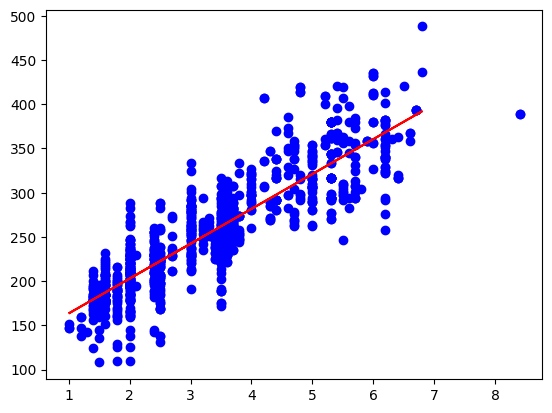

In [35]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,'-r')